# Iris Dataset using KNN-Classification

## IMPORTING LIBRARIES

In [352]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [353]:
#sns.set(rc={'figure.figsize':(9.75,5.25)})
sns.set_style('whitegrid')

## READING THE CSV FILE FROM DATASETS FOLDER

In [354]:
iris_data=pd.read_csv('iris_data_sample.csv',index_col=0,
                      na_values=['??','###'])

## DATA PREPROCESSING

### First 7 rows of the iris dataset

In [355]:
iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,NaN,1.4,0.2,NaN
3,4.7,3.2,1.3,0.2,Iris-setosa
4,NaN,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,NaN,0.2,Iris-setosa
6,5.4,3.9,NaN,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa


### Dropping out the NaN values

In [356]:
iris_data.isna().sum()
iris_data.dropna(inplace=True)

### First 7 rows of updated dataset

In [357]:
iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa
10,4.9,3.1,1.5,0.1,Iris-setosa
11,5.4,3.7,1.5,0.2,Iris-setosa


### Description of the working dataset

In [358]:
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000
mean,5.867123,3.044521,3.820548,1.224658
std,0.825216,0.431362,1.747586,0.756814
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### To identify the special characters which will be considered as NaN values during reading the dataset

In [359]:
col=list(iris_data.columns)
# =============================================================================
# #For identifying special characters
# for i in col:
#     print(np.unique(iris_data[i]))
# =============================================================================

## EXPLORATORY DATA ANALYSIS

### COUNT PLOT OF CATEGORIES

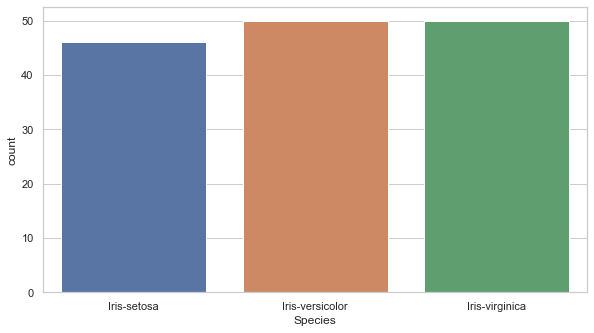

In [360]:
sns.countplot(x='Species',data=iris_data);

### SWARM PLOT OF CATEGORIES ALONG WITH DISTRIBUTION

#### WITH RESPECT TO SEPAL LENGTH

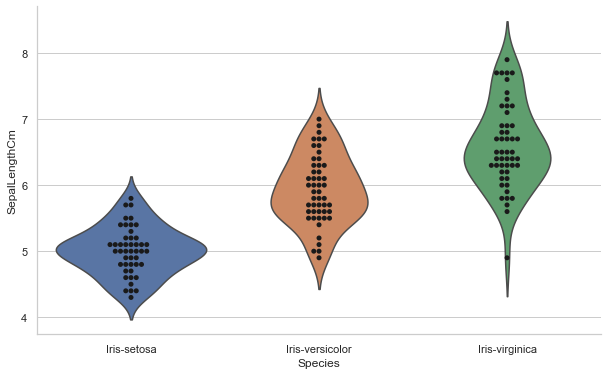

In [361]:
g = sns.catplot(x="Species", y="SepalLengthCm",kind='violin',inner=None,height=5.38, aspect=1.6 ,data=iris_data);
sns.swarmplot(x="Species", y="SepalLengthCm", color='k' ,data=iris_data, ax=g.ax);

#### WITH RESPECT TO SEPAL WIDTH

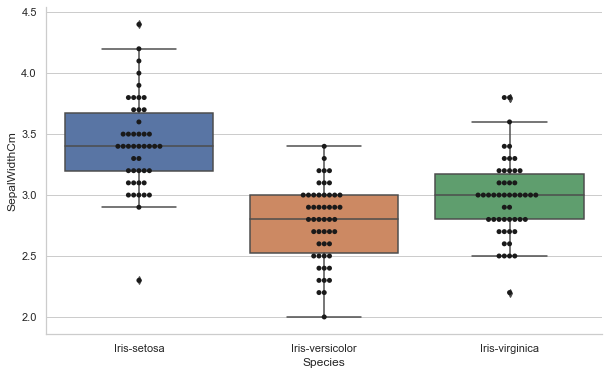

In [362]:
g = sns.catplot(x="Species", y="SepalWidthCm", kind="box",height=5.39, aspect=1.6,data=iris_data);
sns.swarmplot(x="Species", y="SepalWidthCm", color='k' ,data=iris_data, ax=g.ax);

#### WITH RESPECT TO PETAL LENGTH

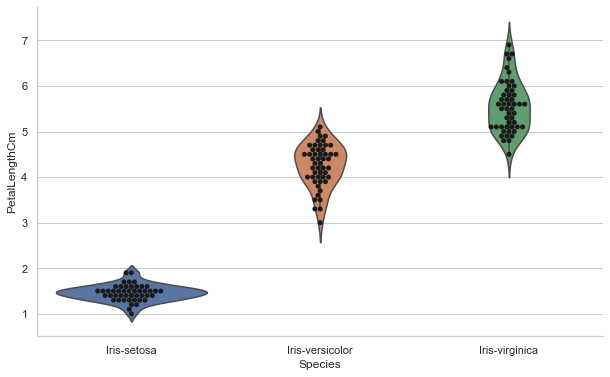

In [363]:
g = sns.catplot(x="Species", y="PetalLengthCm", kind="violin",height=5.4, aspect=1.6,data=iris_data);
sns.swarmplot(x="Species", y="PetalLengthCm", color='k',data=iris_data, ax=g.ax);

#### WITH RESPECT TO PETAL WIDTH

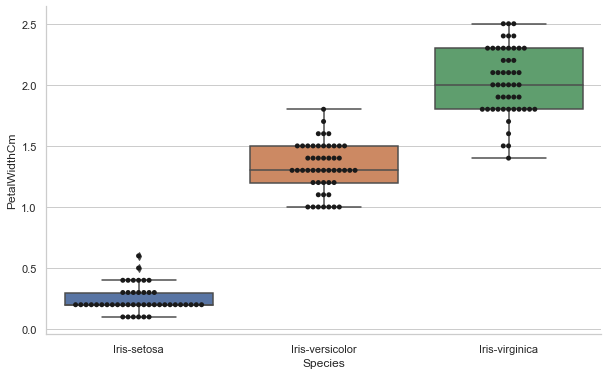

In [364]:
g = sns.catplot(x="Species", y="PetalWidthCm", kind="box",height=5.38, aspect=1.6,data=iris_data);
sns.swarmplot(x="Species", y="PetalWidthCm", color='k',data=iris_data, ax=g.ax);

In [365]:
### Mapping the classification strings to 0,1 and 2
#iris_data['Species']=iris_data['Species'].map({'Iris-setosa':0,
#                                               'Iris-versicolor':1,
#                                               'Iris-virginica':2})

### Splitting the dataset into input features and target variable

In [366]:
x=iris_data.drop('Species',axis=1)
y=iris_data['Species']

### Splitting the dataset into train and test set

In [367]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.25,
                                               random_state=1)

## K-NN CLASSIFICATION MODEL

In [368]:
knn=KNeighborsClassifier(n_neighbors=3).fit(train_x, train_y)

### Predicting the target value

In [369]:
pred_y=knn.predict(test_x)

### Manually predicting the target value

In [370]:
test_list=[[4.9,3.8,1.4,0.2],[4.2,3.1,0.8,0.5]]
test=np.array(test_list).reshape(-1,len(train_x.columns))
prediction=knn.predict(test)
print(prediction)

['Iris-setosa' 'Iris-setosa']


### Confusion matrix

In [371]:
conf_matrix=confusion_matrix(test_y, pred_y)
print(conf_matrix) # Rows are Predicted values and Columns are Actusl values

[[12  0  0]
 [ 0 11  1]
 [ 0  0 13]]


### Accuracy

In [372]:
accuracy=accuracy_score(test_y, pred_y)
print('Accuracy:',accuracy)

Accuracy: 0.972972972972973


### Misclassified value

In [373]:
print('Misclassified value: ',(test_y!=pred_y).sum())

Misclassified value:  1
